In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import time

orb = 16 #number of bands/orbitals

In [2]:
#Importing Wannier90 Hamiltonian

path = "C:/Users/amnedic/Documents/GitHub/RPA_SrCo2As2/Wannier90/SrCo2As2/"
latHam_data = np.genfromtxt(path+'ham_wannier90_hr-SrCo2As2.dat')
L = len(latHam_data)
print('The Wannier functions are defined on', L, 'points in space+orbitals.')

#components of the position vectors in terms of the lattice vectors
list_r = []
#band indices n and m
list_nm = []
#hopping parameter in real space t2
list_re_im = []
for i in range(0, L):
    list_r.append([latHam_data[[i]][0][0], latHam_data[[i]][0][1], latHam_data[[i]][0][2]])
    list_nm.append([int(latHam_data[[i]][0][3]), int(latHam_data[[i]][0][4])])
    list_re_im.append(latHam_data[[i]][0][5] + 1j*latHam_data[[i]][0][6])
    
weights_data = np.genfromtxt(path+'nrpts_wannier90_hr-SrCo2As2.dat', delimiter='\n', dtype=str) #importing weights from Wannier90 output
weights_data_str = [str(t).split() for t in weights_data] 
c_weights_list = [1/int(item) for sublist in weights_data_str for item in sublist]  #c_weights_list is a flat list containing 1/weights
w = len(c_weights_list)

The Wannier functions are defined on 1116416 points in space+orbitals.


In [3]:
#Energy eigenvalues and eigenvectors

def energy(k_biglist):
    eiglist = []
    eigvectors = []
    Ham = np.zeros([16, 16, len(k_biglist)], dtype=complex);
        
    for i in range(w):
        c_exp = np.exp(1j*(np.multiply(k_biglist, list_r[256*i]).sum(1))) #exponent with dot product x*kx + y*ky + z*kz which we will use for FT
        for o in range(256):
            row = 256*i+o
            n = list_nm[row][0]-1;
            m = list_nm[row][1]-1;
            #calculating Hamiltonian in momentum space
            Ham[n][m] += c_weights_list[i]*list_re_im[row]*c_exp;

    #diagonalizing Hamiltonian for each k-value from our list separately                    
    for p in range(len(k_biglist)):
        eig, eigv = la.eigh(Ham[:,:,p])
        eiglist.append(np.real(eig))
        eigvectors.append(eigv)
        
    return (eiglist, eigvectors)

In [4]:
#k_biglist - simple

#N gives discretization for each of kx, ky, kz directions
N = 2000
k_val = np.arange(0, np.pi, np.pi/N);
k_biglist = []
#GX
for t in range(N):
    k_biglist.append([-k_val[t], k_val[t], 0])
#XP
for t in range(N):
    k_biglist.append([-np.pi+k_val[t]/2, np.pi+k_val[t]/2, -k_val[t]/2])
#PN
for t in range(N):
    k_biglist.append([-np.pi/2+k_val[t]/2, 3*np.pi/2-k_val[t]/2, -np.pi/2+k_val[t]/2])
#NG
for t in range(N):
    k_biglist.append([0, np.pi-k_val[t], 0])
#GM
for t in range(N):
    k_biglist.append([k_val[t], k_val[t], -k_val[t]])

In [5]:
start_time = time.time();
energylist = energy(k_biglist)
print(round((time.time()-start_time)/60, 3), 'minutes for calculation.');

0.892 minutes for calculation.


In [6]:
#enenergies are 0th output of our function
ener = energylist[0]
ener_mu = []
mu=6.2693
for E in ener:
    E = E-mu
    ener_mu.append(E)
#eigenvectors are 1th output of our function
ener_v = energylist[1]

In [7]:
#z^2, xz, yz, x^2-y^2, xy
orb_z2 = []
orb_xz = []
orb_yz = []
orb_x2y2 = []
orb_xy = []
orb_z = []
orb_x = []
orb_y = []
x_z2 = []
x_xz = []
x_yz = []
x_x2y2 = []
x_xy = []
x_z = []
x_x = []
x_y = []
for i in range(len(ener_v)):
    vec_all = np.transpose(ener_v[i])
    vec_abs = np.absolute(vec_all)
    for p in range(16):
        arg = np.argmax(vec_abs[p])
        if arg==0 or arg==5:
            orb_z2.append(ener_mu[i][p])
            x_z2.append(i)
        elif arg==1 or arg==6:
            orb_xz.append(ener_mu[i][p])
            x_xz.append(i)
        elif arg==2 or arg==7:
            orb_yz.append(ener_mu[i][p])
            x_yz.append(i)
        elif arg==3 or arg==8:
            orb_x2y2.append(ener_mu[i][p])
            x_x2y2.append(i)
        elif arg==4 or arg==9:
            orb_xy.append(ener_mu[i][p])
            x_xy.append(i)
        elif arg==10 or arg==13:
            orb_z.append(ener_mu[i][p])
            x_z.append(i)
        elif arg==11 or arg==14:
            orb_x.append(ener_mu[i][p])
            x_x.append(i)
        elif arg==12 or arg==15:
            orb_y.append(ener_mu[i][p])
            x_y.append(i)

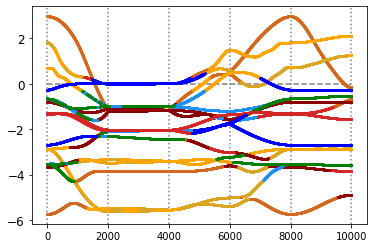

In [8]:
dosf1 = plt.figure()
plt.hlines(y=0., xmin=0.0, xmax=10000, color='gray', linestyle='dashed', alpha=1)
plt.axvline(x=0, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=2000, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=4000, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=6000, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=8000, color='gray', linestyle=':', markersize=0.01)
plt.axvline(x=10000, color='gray', linestyle=':', markersize=0.01)
plt.plot(x_z, orb_z, 'o', color='chocolate', markersize=1)
plt.plot(x_x, orb_x, 'o', color='goldenrod', markersize=1)
plt.plot(x_y, orb_y, 'o', color='orange', markersize=1)
plt.plot(x_x2y2, orb_x2y2, 'o', color='darkred', markersize=1)
plt.plot(x_xz, orb_xz, 'o', color='dodgerblue', markersize=1)
plt.plot(x_yz, orb_yz, 'o', color='green', markersize=1)
plt.plot(x_z2, orb_z2, 'o', color='tab:red', markersize=1)
plt.plot(x_xy, orb_xy, 'o', color='blue', markersize=1)
plt.yticks(fontsize=12)
plt.show()

In [9]:
#dosf1.savefig('bandstructure.pdf', bbox_inches='tight',dpi=2000)

In [4]:
#k_biglist - simple

#N gives discretization for each of kx, ky, kz directions
N = 80
k_val = np.arange(0, 2*np.pi, 2*np.pi/N);
q0=0
#print(k_val)

#making a big list of tuples (kx, ky, kz) with length of N*N*N tuples
k_biglist = []
for a in range(N):
    for b in range(N):
        for c in range(N):
            k_biglist.append([k_val[a], k_val[b], k_val[c]])

In [5]:
#definition of function for susceptibility to calculate the energies for a given list of k-values

def energy(k_biglist):
    eiglist = []
    eigvectors = []
    Ham = np.zeros([16, 16, len(k_biglist)], dtype=complex);
        
    for i in range(w):
        #defining the exponent with dot product x*kx + y*ky + z*kz which we will use for FT
        #it works faster if we include 1j prefactor already here
        c_exp = np.exp(1j*(np.multiply(k_biglist, list_r[256*i]).sum(1)))
        for o in range(256):
            row = 256*i+o
            n = list_nm[row][0]-1;
            m = list_nm[row][1]-1;
            #calculating Hamiltonian in momentum space
            Ham[n][m] += list_re_im[row]*c_exp;

    #diagonalizing Hamiltonian for each k-value from our list separately                    
    for p in range(len(k_biglist)):
        eig, eigv = la.eigh(Ham[:,:,p])
        eiglist.append(np.real(eig))
        eigvectors.append(eigv)
        
    return (eiglist, eigvectors)

In [7]:
start_time = time.time();
energylist = energy(k_biglist)
print(round((time.time()-start_time)/60, 3), 'minutes for calculation.');

100.683 minutes for calculation.


In [ ]:
#eigenenergies are 0th output of our function
ener = np.real(energylist[0])
#eigenvectors are 1th output of our function
ener_v = energylist[1]

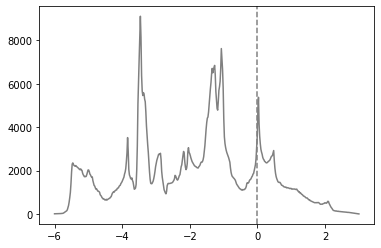

In [10]:
ener1 = np.array(ener)-6.2693
ener1 = [item for sublist in ener1 for item in sublist]
ener1 = np.array(ener1)

x=[]
y=[]
num=500
#delta = 8/num
delta=0.01
for t in range(num+1):
    omega = -6+9*(t/num)
    x.append(omega)
    dos_sublist = (delta/((omega-ener1)**2 + delta**2))
    dos=np.sum(dos_sublist)
    y.append((1/np.pi)*dos/num)
plt.plot(x, y, 'gray')
plt.axvline(x=0, color='gray', linestyle='dashed')
plt.show()

In [11]:
#summing all states up to Fermi level and later normalizing to the filling of 13
print(x[333],x[334])
ys = sum(y[0:334])

-0.005999999999999339 0.012000000000000455


In [12]:
#z^2, xz, yz, x^2-y^2, xy
orb_z2 = []
orb_xz = []
orb_yz = []
orb_x2y2 = []
orb_xy = []
list_z2 = [0,5]
list_xz = [1,6]
list_yz = [2,7]
list_x2y2 = [3,8]
list_xy = [4,9]
for i in range(len(ener_v)):
    vec_all = np.transpose(ener_v[i])
    for j in range(16):
        #z2
        en_orb = []
        for k in list_z2:
            en_orb.append(vec_all[j][k]*np.conj(vec_all[j][k]))
        orb_z2.append(sum(en_orb))
        
        #xz
        en_orb = []
        for k in list_xz:
            en_orb.append(vec_all[j][k]*np.conj(vec_all[j][k]))
        orb_xz.append(sum(en_orb))
        
        #yz
        en_orb = []
        for k in list_yz:
            en_orb.append(vec_all[j][k]*np.conj(vec_all[j][k]))
        orb_yz.append(sum(en_orb))
        
        #x2y2
        en_orb = []
        for k in list_x2y2:
            en_orb.append(vec_all[j][k]*np.conj(vec_all[j][k]))
        orb_x2y2.append(sum(en_orb))

        #xy
        en_orb = []
        for k in list_xy:
            en_orb.append(vec_all[j][k]*np.conj(vec_all[j][k]))
        orb_xy.append(sum(en_orb))
        
orb_z2 = np.array(orb_z2)
orb_xz = np.array(orb_xz)
orb_yz = np.array(orb_yz)
orb_x2y2 = np.array(orb_x2y2)
orb_xy = np.array(orb_xy)

x=[]
y_z2=[]
y_xz = []
y_yz = []
y_x2y2 = []
y_xy = []
num=500
# delta=8/num
delta=0.01
for t in range(num+1):
    omega = -6+9*(t/num)
    x.append(omega)
    dos_sublist1 = (delta/((omega-ener1)**2 + delta**2))*orb_z2
    dos_sublist2 = (delta/((omega-ener1)**2 + delta**2))*orb_xz
    dos_sublist3 = (delta/((omega-ener1)**2 + delta**2))*orb_yz
    dos_sublist4 = (delta/((omega-ener1)**2 + delta**2))*orb_x2y2
    dos_sublist5 = (delta/((omega-ener1)**2 + delta**2))*orb_xy
    dos1=np.sum(dos_sublist1)
    dos2=np.sum(dos_sublist2)
    dos3=np.sum(dos_sublist3)
    dos4=np.sum(dos_sublist4)
    dos5=np.sum(dos_sublist5)
    y_z2.append((1/np.pi)*dos1/num)
    y_xz.append((1/np.pi)*dos2/num)
    y_yz.append((1/np.pi)*dos3/num)
    y_x2y2.append((1/np.pi)*dos4/num)
    y_xy.append((1/np.pi)*dos5/num)

In [14]:
#all Co orbitals
orb_Co = []
list_Co = [0,1,2,3,4,5,6,7,8,9]
for i in range(len(ener_v)):
    vec_all = np.transpose(ener_v[i])
    for j in range(16):
        en_orb = []
        for k in list_Co:
            en_orb.append(vec_all[j][k]*np.conj(vec_all[j][k]))
        orb_Co.append(sum(en_orb))
orb_Co = np.array(orb_Co)
x=[]
y_Co=[]
num=500
#delta=8/num
delta=0.01
for t in range(num+1):
    omega = -6+9*(t/num)
    x.append(omega)
    dos_sublist = (delta/((omega-ener1)**2 + delta**2))*orb_Co
    dos=np.sum(dos_sublist)
    y_Co.append((1/np.pi)*dos/num)

In [13]:
#all As orbitals
orb_As = []
list_As = [10,11,12,13,14,15]
for i in range(len(ener_v)):
    vec_all = np.transpose(ener_v[i])
    for j in range(16):
        en_orb = []
        for k in list_As:
            en_orb.append(vec_all[j][k]*np.conj(vec_all[j][k]))
        orb_As.append(sum(en_orb))
orb_As = np.array(orb_As)
x=[]
y_As=[]
num=500
#delta=8/num
delta=0.01
for t in range(num+1):
    omega = -6+9*(t/num)
    x.append(omega)
    dos_sublist = (delta/((omega-ener1)**2 + delta**2))*orb_As
    dos=np.sum(dos_sublist)
    y_As.append((1/np.pi)*dos/num)

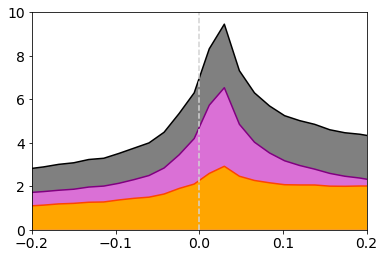

In [27]:
#total, Co and As
plt.plot(x, np.real(y_As/ys)*13/delta, 'orangered')
plt.plot(x, np.real(y_Co/ys)*13/delta, 'purple', markersize=1)
plt.fill_between(x, 0, y/ys*13/delta, facecolor='gray')
plt.plot(x, (y/ys)*13/delta, 'k')
plt.fill_between(x, 0, y_Co/ys*13/delta, facecolor='orchid')
plt.fill_between(x, 0, y_As/ys*13/delta, facecolor='orange')
plt.xlim(-0.2,0.2)
plt.ylim(0,10)
plt.xticks([-0.2,-0.1,0,0.1,0.2],fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=0, color='lightgray', linestyle='--', markersize=0.01)
plt.show()

In [116]:
ind=333
print('x=',x[ind])
print('DoS', y[ind]/ys*13)
print(np.real(y_x2y2[ind]/y_xy[ind]))
print(np.real(y_yz[ind]/y_xy[ind]))
print(np.real(y_xz[ind]/y_xy[ind]))
print(np.real(y_z2[ind]/y_xy[ind]))
print(np.real(y_xy[ind]/y_xy[ind]))

x= -0.005999999999999339
DoS 0.06299743864861976
0.13818881136861047
0.1844936109661883
0.1845362016796584
0.3372463688340795
1.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


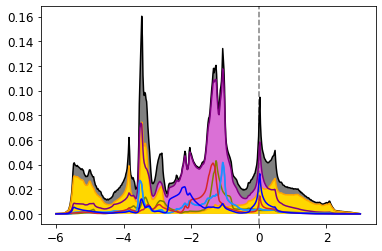

In [169]:
#All
dosf = plt.figure()
plt.axvline(x=0, color='gray', linestyle='--', markersize=0.01)
plt.plot(x, y/ys*13, 'k')
plt.plot(x, y_As/ys*13, 'orange')
plt.plot(x, y_Co/ys*13, 'purple')

# plt.plot(x, y_x2y2/ys*13, 'dodgerblue')
# plt.plot(x, y_yz/ys*13, 'darkred')
# plt.plot(x, y_xz/ys*13, 'darkred')
# plt.plot(x, y_z2/ys*13, 'green')
# plt.plot(x, y_xy/ys*13, 'blue')

plt.plot(x, y_x2y2/ys*13, 'olive')
plt.plot(x, y_yz/ys*13, 'dodgerblue')
plt.plot(x, y_xz/ys*13, 'dodgerblue')
plt.plot(x, y_z2/ys*13, 'tab:red')
plt.plot(x, y_xy/ys*13, 'blue')

plt.fill_between(x, 0, y/ys*13., facecolor='gray')
plt.fill_between(x, 0, y_Co/ys*13., facecolor='orchid')
plt.fill_between(x, 0, y_As/ys*13., facecolor='gold')
#plt.fill_between(x, 0, y_eg/ys*13., facecolor='cadetblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [170]:
dosf.savefig('dos_sym_full_v4.pdf', bbox_inches='tight',dpi=2000)